In [1]:
#cargar los datos de entrenamiento
import numpy as np
train_matrix = np.load('features/matriz_datos_train.npy')
# print(train_matrix)
#seleccionar características y target
X_train = train_matrix[:,:-1]
y_train = train_matrix[:, -1]
print(np.shape(X_train))
print(X_train)

(77, 23)
[[1.42622951 1.         0.66428851 ... 0.06110283 0.03725782 0.0804769 ]
 [2.16393443 2.         1.08914657 ... 0.0564663  0.06010929 0.10746812]
 [1.08196721 1.         0.73093432 ... 0.06902502 0.09145816 0.11993098]
 ...
 [1.95081967 2.         0.8183596  ... 0.04262295 0.04262295 0.07377049]
 [1.75409836 2.         0.80277669 ... 0.06147541 0.04918033 0.09426229]
 [1.75409836 1.         2.17779959 ... 0.05269321 0.11065574 0.12002342]]


In [2]:
#estandarización de datos de entrenamiento
from sklearn.preprocessing import StandardScaler
estandarizador = StandardScaler()
estandarizador.fit(X_train)
mu = estandarizador.mean_
sigma = np.sqrt(estandarizador.var_)#raiz cuadrada de la varianza
X_train = estandarizador.transform(X_train)
# print(X_train[0])
# print(X_train_new[0])


In [3]:
#seleccion de los atributos (Características)
#estudiar si las variables siguen una distribución normalde media y desviación tipica de 1 -->N(0,1)
from scipy.stats import kstest # prueba de kolmovorov saber si sigue una distribución normal
alpha = 0.01 #nivel de confianza del 99%
h_norm = np.zeros(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    _, pvalue = kstest(X_train[:, i], 'norm')
    
    #contraste de hipotesis
    if pvalue <= alpha:
        h_norm[i] =0 # los datos no siguen una distribución normal
    else:
        h_norm[i] = 1
print('0: no normal ----1:si normal', h_norm)
# print(X_train.shape)


0: no normal ----1:si normal [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.]


In [4]:
def draw_boxplot(data1, data2, ticks):
    import matplotlib.pyplot as plt
    bpl = plt.boxplot(data1, positions=np.array(range(np.shape(data1)[1]))*2.0-0.4, sym='',widths=0.5,\
                     boxprops=dict(color='red'),
                     capprops=dict(color='red'),
                      whiskerprops=dict(color='red'),
                      medianprops=dict(color='red'))
    bpl = plt.boxplot(data2, positions=np.array(range(np.shape(data1)[1]))*2.0-0.4, sym='',widths=0.5,\
                     boxprops=dict(color='red'),
                     capprops=dict(color='red'),
                      whiskerprops=dict(color='red'),
                      medianprops=dict(color='red'))
    plt.plot([], c='#D7191C', label='Glaucoma')
    plt.plot([], c='#2C7BB6', label='Healthy')
    plt.legend()
    
    plt.xticks(range(0,len(ticks)*2,2), ticks)
    plt.xlim(-2, len(ticks)*2)
    plt.grid(True)
    plt.title('características')
    plt.show()
                      

0: no discrimina, 1: si discrimina [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(77, 2)
(2,)
(2,)


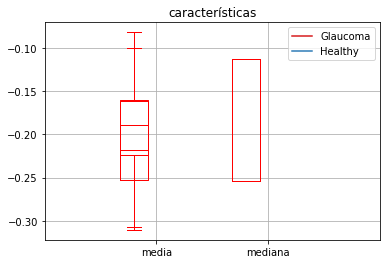

características discriminatorias:  ['std' 'LBP4']
características no discriminatorias:  ['ASM' 'COR' 'E' 'LBP1' 'LBP10' 'LBP2' 'LBP3' 'LBP5' 'LBP6' 'LBP7' 'LBP8'
 'LBP9' 'asim' 'con' 'curtosis' 'dis' 'homo' 'max' 'media' 'mediana' 'min']


In [5]:
#Estudiar la capacidad discrimiantiva de los atributos en función de su distribución
from scipy.stats import ttest_ind, mannwhitneyu

glaucoma_data = X_train[y_train==1]
healthy_data = X_train[y_train==0]

h= np.zeros(X_train.shape[1])
h_disc = np.zeros(X_train.shape[1])

for i in range(0, X_train.shape[1]):
    if h_norm[i] ==0:#no es normal comparación de medianas mannwhitneyu
        _, pvalue = mannwhitneyu(glaucoma_data[:,i], healthy_data[:,i])
    else:#si es normal  comparación de medias ttest_ind
        _, pvalue = ttest_ind(glaucoma_data[:,i], healthy_data[:,i])
    #contraste de hipotesis, estudiar el poder discriminatorio de las caracterisiticas
    #h0 independencia entre la característica y la clase 
    if pvalue<=alpha:
        h_disc[i] = 1 # se rechaza la h0 y, por lo tanto, asumimos las dependecias entre las características y la clase
    else:
        h_disc[i]= 0 # no hay evidencia para rechazar la H0y por tanto asumimos que la característica y la clase son independientes

print('0: no discrimina, 1: si discrimina', h_disc)
#eliminando las variables que no son discriminatorias 
id_no_disc = np.where(h_disc==0)
X_train_disc = np.delete(X_train,id_no_disc[0],axis=1)
mu_disc = np.delete(mu, id_no_disc[0])
sigma_disc = np.delete(sigma, id_no_disc[0])

print(np.shape(X_train_disc))
print(np.shape(mu_disc))
print(np.shape(sigma_disc))

#visualización
original_ticks = ['media','mediana','std', 'asim','curtosis','min','max','con','dis','homo','ASM','E','COR',
                 'LBP1','LBP2','LBP3','LBP4','LBP5','LBP6','LBP7','LBP8','LBP9','LBP10']
draw_boxplot(glaucoma_data[:,:2], healthy_data[:,:2],original_ticks[:2])
ticks = np.delete(original_ticks, id_no_disc[0] )
print('características discriminatorias: ', ticks)
print('características no discriminatorias: ', np.setdiff1d(original_ticks,ticks))


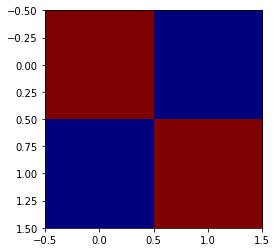

Características correladas: []
Características NO correladas: ['LBP4' 'std']
(77, 2)


In [6]:
#realizar análisis de correlación para ver la dependencia entre pares de variables
R = np.corrcoef(X_train_disc.transpose())
import matplotlib.pyplot as plt
plt.imshow(R, cmap='jet')
plt.show()

th_cor = 0.9
idx = abs(R)>th_cor
mat_tri_sup = np.triu(idx,1)
# print(mat_tri_sup.astype('uint8'))
row, col = np.where(mat_tri_sup == True)
id_corr = np.unique(col)
print('Características correladas:',ticks[id_corr])
print('Características NO correladas:',np.setdiff1d(ticks,ticks[id_corr]))

#eliminamos las variables correlacionadas
X_final = np.delete(X_train_disc, id_corr, axis=1)
mu_final = np.delete(mu_disc, id_corr)
sigma_final = np.delete(sigma_disc,id_corr)
ticks = np.delete(ticks, id_corr)

print(np.shape(X_final))

In [7]:
# guardado de matriz final de características
import os
if not os.path.exists('final_features'):
    os.mkdir('final_features')
y_train_exp = np.expand_dims(y_train, axis = 1)
train_natrix = np.concatenate((X_final, y_train_exp), axis=1)
np.save('final_features/train.npy',train_matrix)
# print(np.shape(X_final))
# print(np.shape(y_train_exp))

In [8]:
#repetir el proceso para la selección de las características del test

test_matrix = np.load('features/matriz_datos_test.npy')

#seleccionar las características y la clase
X_test = test_matrix[:,:-1]
y_test = test_matrix[:, -1]

#eliminar las características que no son discriminatorias durante entrenamiento
# id_no _disc
X_test_disc = np.delete(X_test, id_no_disc[0], axis=1)

#eliminar las características correladas durante entrenamiento 
#id_corr
X_test_final = np.delete(X_test_disc, id_corr,axis=1)

#estandarización de las características del test en base la mu y la sigma del entrenamiento
X_test_final = (X_test_final - mu_final)/sigma_final

#guardado de la matriz de datos de test
y_test_exp = np.expand_dims(y_test, axis=1)
test_matrxi = np.concatenate((X_test_final, y_test_exp), axis=1)

np.save('final_features/test.npy',test_matrix)
print(np.shape(X_test_final))


(19, 2)
